In [2]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
# Try a different edition if you're not sure which one you have
config.init('se')  # Try Stata/SE instead of MP
# Or
config.init('be')  # Try Stata/BE

In [3]:
import tempfile
import os
import pandas as pd
from pystata import stata

# Step 1: Load the Stata dataset via pystata
stata.run('use "Sheikhupura2.dta", clear') 



# Optionally, run any preprocessing commands in Stata here:
# stata.run('drop if missing(some_variable)')
# stata.run('keep if condition')

# Step 2: Create a temporary CSV file for exporting data
temp_csv = tempfile.NamedTemporaryFile(delete=False, suffix=".csv")
temp_csv.close()  # Close the file so that Stata can write to it

# Export the dataset to the temporary CSV file using Stata's export command
stata.run(f'export delimited using "{temp_csv.name}", replace')

# Step 3: Read the exported CSV into a Pandas DataFrame
df = pd.read_csv(temp_csv.name,low_memory=False)

# (Optional) Remove the temporary file now that the data is loaded
os.unlink(temp_csv.name)

# Verify the data loaded correctly
print(df.head())

file C:\Users\PMLS\AppData\Local\Temp\tmpzih15oe8.csv saved
      hhcode      psu province region     district  idc relationship_to_head  \
0  234100103  2341001   punjab  rural  sheikhupura    3         son/daughter   
1  234100103  2341001   punjab  rural  sheikhupura    4         son/daughter   
2  234100104  2341001   punjab  rural  sheikhupura    6         son/daughter   
3  234100104  2341001   punjab  rural  sheikhupura    5         son/daughter   
4  234100104  2341001   punjab  rural  sheikhupura    7         son/daughter   

      reason_for_headship  gender residence_status  ...  edu_level  \
0  main economic provider  female          present  ...        NaN   
1  main economic provider    male          present  ...        NaN   
2  main economic provider  female          present  ...        NaN   
3  main economic provider  female          present  ...        NaN   
4  main economic provider    male          present  ...        NaN   

   edu_level_num  head_gender  employm

In [4]:
features = [
    'age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 
    'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 
    'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 
    'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 
    'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 
    'total_household_income', 
    'house_owner_gender','household_ran_out_of_food', 
    'hungry_but_did_not_eat', 'income_used_for_hh','marital_status', 
    'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 
    'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 
    'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 
    'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 
    'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 
    'work_days_last_month', 'worked_last_month', 'worried_about_food', 'disability', 'has_mobile_phone','total_assets',
    'house_owner_gender','years_to_complete_primary',
    'has_laptop','toilet_type','heating_fuel','head_gender','head_age','head_edu_level_num','transport_mode','occupancy_status','received_in_kind_income',
]


In [5]:
feature_names = df.columns.tolist()
print(feature_names )

['hhcode', 'psu', 'province', 'region', 'district', 'idc', 'relationship_to_head', 'reason_for_headship', 'gender', 'residence_status', 'age', 'age_days', 'age_month', 'birth_year', 'marital_status', 'spouse_id', 'father_id', 'mother_id', 'household_member', 'born_in_district', 'born_district_type', 'born_district_code', 'migration_year', 'prev_district_type', 'prev_district_code', 'migration_reason', 'difficulty_seeing', 'difficulty_hearing', 'difficulty_walking', 'memory_problem', 'difficulty_self_care', 'difficulty_speaking', 'can_read', 'can_write', 'can_do_math', 'attended_training', 'education_background', 'no_school_reason', 'last_school_type', 'school_enrollment_reason', 'highest_grade', 'years_to_complete_primary', 'enrolled_last_year', 'last_year_grade', 'completed_last_year_grade', 'left_school_reason', 'current_school_type', 'current_school_reason', 'school_start_age', 'current_grade', 'enrolled_last_year_current', 'last_year_grade_current', 'yrs_to_complete_pri_current', '

In [6]:
 # target = 'education_access'
 # # Separate features and target variable

 # y = df[target]


In [7]:
target = 'education_access'

# Encode target variable
y= df[target].map({'Yes': 1, 'No': 0})
X = df[features]

In [8]:
column_list = X.columns.tolist()
print(column_list)

['age', 'birth_last_3yrs', 'born_district_type', 'born_in_district', 'can_do_math', 'can_report_income', 'can_write', 'computer_location', 'connected_to_sewerage', 'cooking_water_source', 'disability', 'dwelling_type', 'employment_status', 'first_prenatal_visit_month', 'gender', 'handwashing_water_source', 'has_computer', 'has_handwashing_place', 'has_internet', 'has_job', 'has_mobile', 'has_mobile_phone', 'total_household_income', 'house_owner_gender', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'income_used_for_hh', 'marital_status', 'migration_reason', 'monthly_income', 'no_computer_reason', 'no_mobile_reason', 'num_prenatal_visits', 'num_rooms', 'pay_for_water', 'prenatal_consultation_source', 'prenatal_consultations', 'property_owner_gender', 'reason_for_headship', 'region', 'relationship_to_head', 'residence_status', 'sick_last_2wks', 'shared_toilet', 'sufficient_drinking_water', 'toilet_type', 'used_computer', 'used_mobile', 'work_days_last_month', 'worked_last_month'

In [9]:
# Encode categorical variables
X = pd.get_dummies(X)


In [10]:
X = X.loc[:, ~X.columns.duplicated()]


In [11]:
column_list = X.columns.tolist()
print(column_list)

['age', 'first_prenatal_visit_month', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'total_assets', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'transport_mode', 'birth_last_3yrs_3', 'birth_last_3yrs_rural', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cookin

In [12]:
duplicates = X.columns[X.columns.duplicated()]
print(duplicates)


Index([], dtype='object')


In [13]:
X = X[X.columns.drop(list(X.filter(regex='-1')))]

In [14]:
import warnings

# Ignore RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [15]:
column_list = X.columns.tolist()

print(column_list)


['age', 'first_prenatal_visit_month', 'total_household_income', 'household_ran_out_of_food', 'hungry_but_did_not_eat', 'monthly_income', 'num_prenatal_visits', 'num_rooms', 'prenatal_consultations', 'property_owner_gender', 'work_days_last_month', 'worried_about_food', 'total_assets', 'years_to_complete_primary', 'head_gender', 'head_age', 'head_edu_level_num', 'transport_mode', 'birth_last_3yrs_3', 'birth_last_3yrs_rural', 'born_district_type_rural', 'born_district_type_urban', 'born_in_district_no', 'born_in_district_yes', 'can_do_math_no', 'can_do_math_yes', 'can_report_income_annually', 'can_report_income_monthly', 'can_report_income_recieve only in kind', 'can_write_no', 'can_write_yes', 'computer_location_  home', 'computer_location_education place', 'connected_to_sewerage_no, no system', 'connected_to_sewerage_yes under ground drain', 'connected_to_sewerage_yes, to covered drain', 'connected_to_sewerage_yes, to open drain', 'cooking_water_source_ motor pump / tube well', 'cookin

In [18]:
import numpy as np
np.seterr(all="ignore")  # Ignores divide-by-zero and invalid value warnings

from sklearn.preprocessing import MinMaxScaler
 # Assuming X is a pandas DataFrame
scaler = MinMaxScaler()
 # Convert the scaled array back to a DataFrame (optional)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
 # Calculate correlations
correlations = X.corrwith(y)

In [19]:
 # Convert correlations to a DataFrame for better printing
corr_df = pd.DataFrame(correlations.abs().sort_values(ascending=False), columns=['Correlation'])

In [20]:
 # Print all correlations
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 print(corr_df)


                                                    Correlation
can_do_math_no                                         0.378484
worked_last_month_yes                                  0.350540
income_used_for_hh_yes                                 0.315451
can_report_income_monthly                              0.312086
employment_status_yes (can't do at all)                0.292970
monthly_income                                         0.265628
total_household_income                                 0.256365
has_mobile_none of above                               0.190724
can_write_yes                                          0.173690
age                                                    0.168664
has_handwashing_place_yes                              0.155854
has_handwashing_place_no                               0.155854
employment_status_5                                    0.152383
has_job_not but seeking work                           0.147648
has_mobile_mobile phone                 

In [21]:
 # Filter for correlations with absolute value greater than 0.01
 selected_features = correlations[abs(correlations) >= 0.01].index
 print(len(X.columns))
 print(len(selected_features))

164
133


In [22]:
 # Filter for correlations with absolute value greater than 0.05
 # Keep only the selected columns in X
 X = X[selected_features]
 print(len(X.columns))

133


In [23]:
# handling the missing values
missing_counts = X.isnull().sum()
thresh = 1500
cols_to_remove = missing_counts[missing_counts > thresh].index.tolist()
print(cols_to_remove)

['total_household_income', 'monthly_income', 'property_owner_gender', 'head_edu_level_num', 'transport_mode']


In [24]:
X = X.drop(columns=cols_to_remove)

In [25]:
#encoding the catagorical variables
y = pd.get_dummies(y)

In [26]:
from sklearn.model_selection import train_test_split
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making Random Forest Model

In [27]:
import numpy as np

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)


In [28]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# # Initialize the Random Forest Classifier
#     # use all processors

# rf_model = RandomForestClassifier(
#     n_estimators=50,        
#     max_depth=10,            
#     min_samples_split=20,     
#     min_samples_leaf=6,      
#     random_state=42,
#     n_jobs=-1,
#      # Automatically adjusts based on class imbalance
# )

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print a detailed classification report
# print(classification_report(y_test, y_pred))

# # Optionally, display the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)


In [29]:
print(y.value_counts(normalize=True))


0      1    
False  True     0.793293
True   False    0.206707
Name: proportion, dtype: float64


In [31]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# # Fit model
# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=30,
#     min_samples_split=3,
#     min_samples_leaf=5,
#     random_state=42,
#     class_weight={0: 1.5, 1: 1}  # Increase weight for class 0
# )
# rf_model.fit(X_train, y_train)

# # Predict probabilities
# y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# # Custom threshold
# threshold = 0.6  # Try changing this to 0.4, 0.5, 0.7, etc.
# y_pred_thresh = (y_proba >= threshold).astype(int)

# # Evaluation
# print(f"\nClassification Report (Threshold = {threshold}):")
# print(classification_report(y_test, y_pred_thresh))

# # Optional: Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_thresh))

# # Optional: ROC Curve
# fpr, tpr, _ = roc_curve(y_test, y_proba)
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()


In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Simplified Random Forest with Overfitting Prevention
rf_model = RandomForestClassifier(
    n_estimators=100,        # Reduced number of trees
    max_depth=30,           # Limit tree depth
    min_samples_split=3,   # Increase minimum samples to split
    min_samples_leaf=5,     # Increase minimum samples in leaf
    random_state=42,
    class_weight='balanced_subsample'
)

# Cross-validation to check model performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

   

Cross-validation scores: [0.84451718 0.84779051 0.83797054 0.86393443 0.86557377]
Mean CV Score: 0.8520 (+/- 0.0219)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       177
           1       0.89      0.91      0.90       587

    accuracy                           0.85       764
   macro avg       0.79      0.78      0.78       764
weighted avg       0.85      0.85      0.85       764



                                               Feature  Importance
0                                                  age    0.158786
11                                      can_do_math_no    0.087511
5                                             head_age    0.050938
15                                       can_write_yes    0.050241
113                              worked_last_month_yes    0.031291
61                              income_used_for_hh_yes    0.029224
127                         received_in_kind_income_no    0.028006
49                         has_job_no not seeking work    0.025099
45                            has_handwashing_place_no    0.023602
112                               worked_last_month_no    0.023009
3                                            num_rooms    0.021698
12                                     can_do_math_yes    0.021461
68         no_computer_reason_don’t know how to use it    0.017579
14                           can_report_income_monthly    0.01

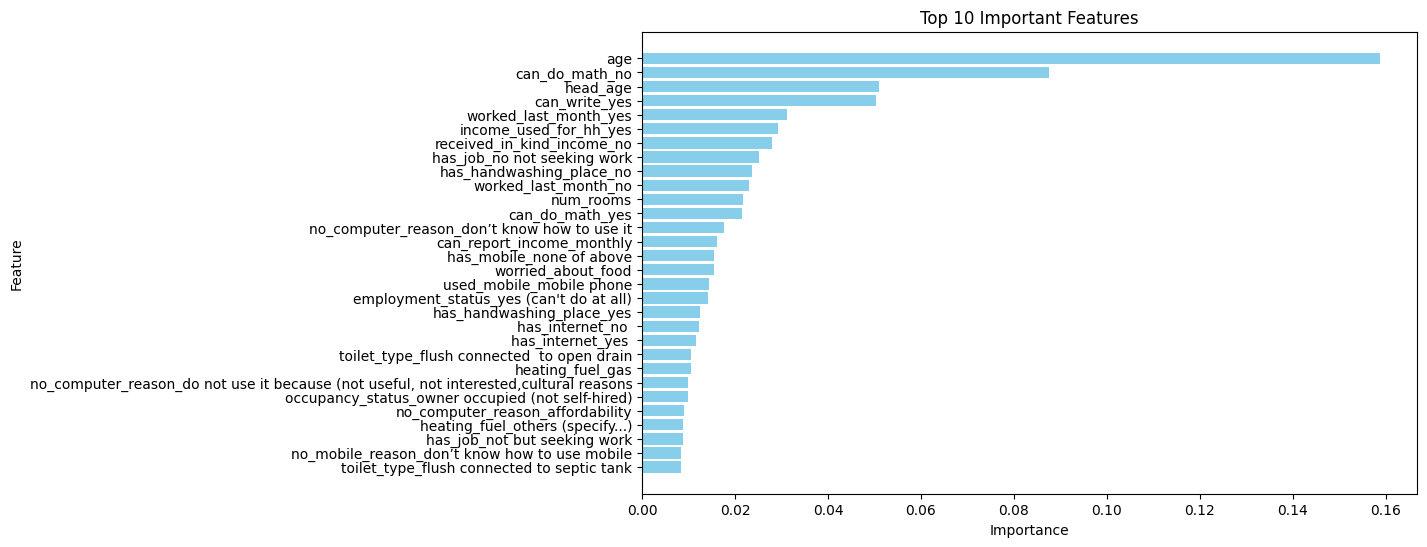

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Select top 30 features
top_30_features = feature_importance_df.head(30)

# Display top 30 features
print(top_30_features)



# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:30], feature_importance_df['Importance'][:30], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show top features on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.show()


# SHAP  Visualizations

In [34]:
import shap

C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# explainer = shap.Explainer(model, X_train)
# shap_values = explainer.shap_values(X_test)

In [36]:
# test_data = X_test

In [37]:
# # Convert categorical columns to numeric using one-hot encoding
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

# # Ensure both training and test sets have the same columns (in case one-hot encoding changes the columns)
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


 99%|===================| 1515/1528 [01:32<00:00]        

Full SHAP values shape: (764, 128, 2)
SHAP values for class 1 shape: (764, 128)
Subset SHAP values shape: (300, 128)


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


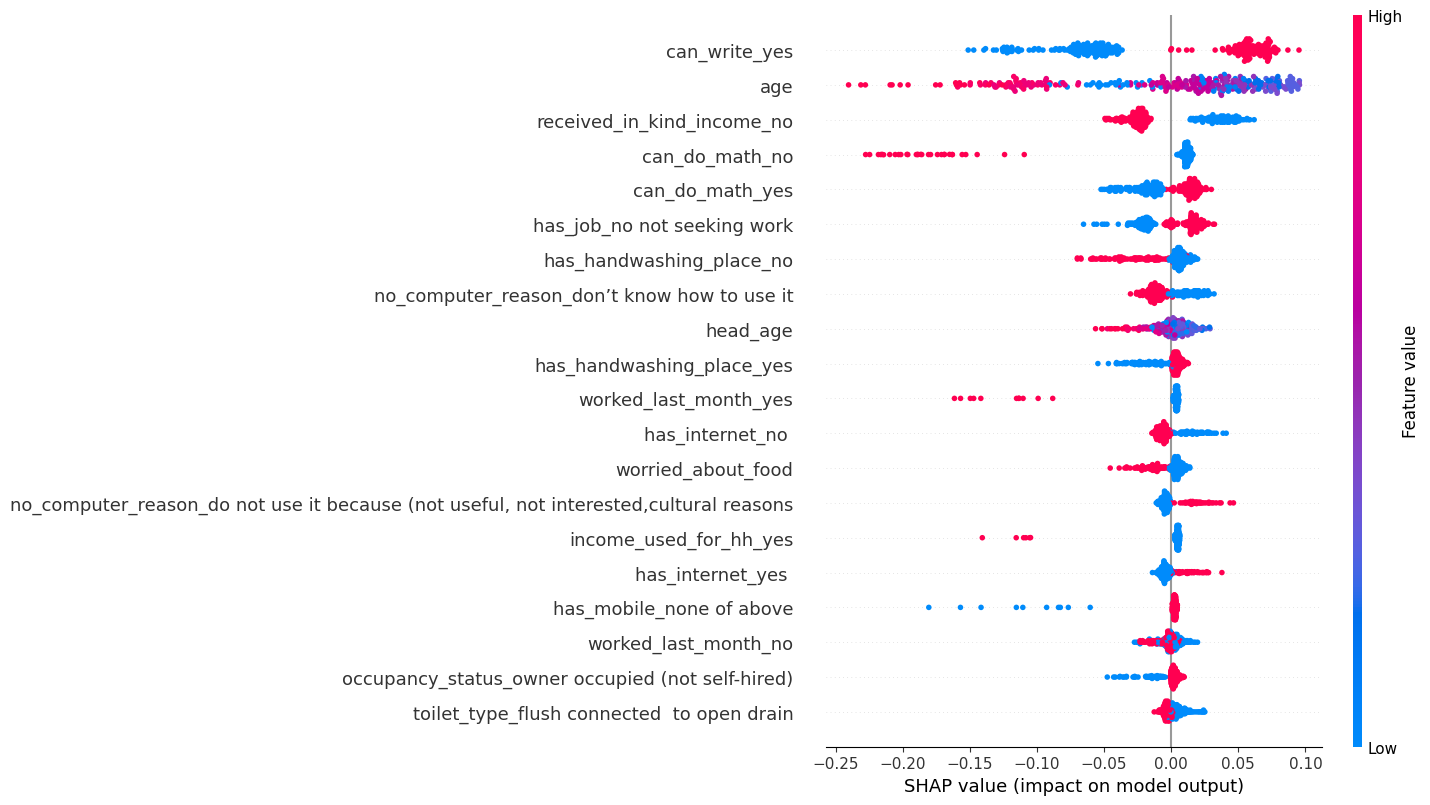

<Figure size 640x480 with 0 Axes>

In [35]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Create a subset of your test data for visualization
# -------------------------------
# Use the first 300 samples for faster plotting.
X_test_subset = X_test.iloc[:300]

# -------------------------------
# 2. Initialize the Explainer using the universal SHAP Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)

# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  # Expected: (820, n_features, n_classes)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  # Expected: (820, n_features)

# -------------------------------
# 5. Subset the SHAP values to match the subset of test data
# -------------------------------
shap_values_subset = shap_values_class1[:300, :]
print("Subset SHAP values shape:", shap_values_subset.shape)  # Expected: (300, n_features)

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the subset
# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class, subset to 300 samples
    X_test_subset,              # Subset of test data for visualization
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300)
plt.show()


In [70]:
# # Check the data types of the columns in X_train and X_test
# print(X_train.dtypes)
# print(X_test.dtypes)


In [71]:
# # Convert all boolean columns to integers (0 and 1)
# X_train = X_train.astype(int)
# X_test = X_test.astype(int)


100%|===================| 1523/1528 [01:32<00:00]        

Full SHAP values shape: (764, 128, 2)
SHAP values for class 1 shape: (764, 128)


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


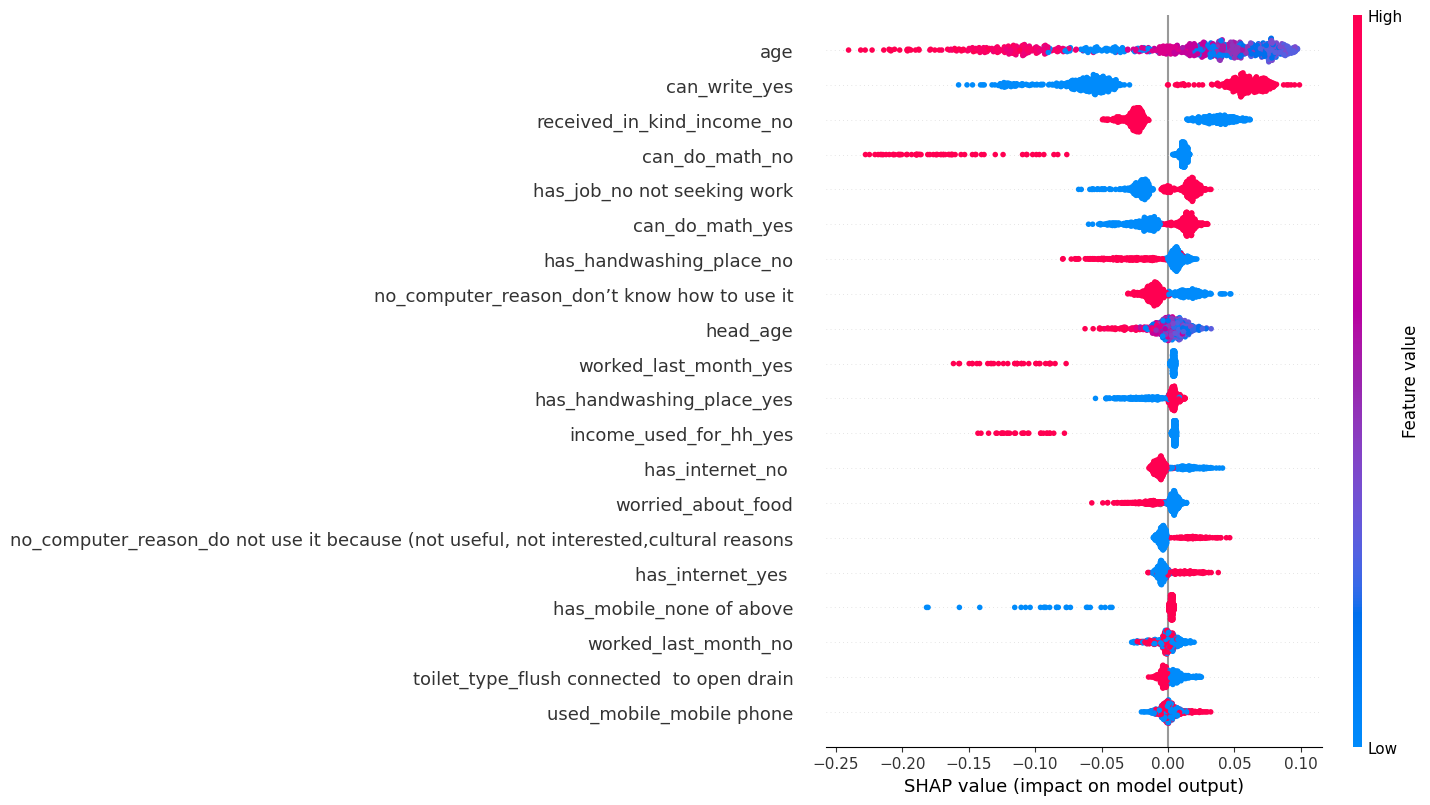

<Figure size 640x480 with 0 Axes>

In [37]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1. Use the entire test set for visualization
# -------------------------------
X_test_subset = X_test  # Using the entire test set

# -------------------------------
# 2. Initialize the Explainer for your Random Forest model
# -------------------------------
explainer = shap.Explainer(rf_model, X_train)
  
# -------------------------------
# 3. Compute SHAP values on the entire test set, disabling the additivity check.
# -------------------------------
shap_values = explainer(X_test, check_additivity=False)
print("Full SHAP values shape:", shap_values.values.shape)  
# Expected shape: (n_samples, n_features, n_classes) e.g. (820, 114, 2)

# -------------------------------
# 4. Extract SHAP values for the positive class (index 1)
# -------------------------------
shap_values_class1 = shap_values.values[:, :, 1]
print("SHAP values for class 1 shape:", shap_values_class1.shape)  
# Expected shape: (n_samples, n_features)

# -------------------------------
# 5. Use all SHAP values (matching the entire test set)
# -------------------------------
shap_values_subset = shap_values_class1  # using entire test set

# -------------------------------
# 6. Create the SHAP summary plot for feature importance using the full test set/

# -------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_subset,         # SHAP values for the positive class for all samples
    X_test_subset,              # The full test set
    feature_names=X_train.columns  # Feature names from your training data
)
plt.tight_layout()
plt.savefig('shap_summary_plot_full.png', dpi=300)
plt.show()


In [38]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP summary plot and save it directly
shap.summary_plot(
    shap_values_subset,        # SHAP values
    X_test_subset,             # Corresponding input data
    feature_names=X_train.columns,  # Feature names
    show=False                 # Prevents it from displaying immediately
)

# Save the current figure in high resolution
plt.savefig('sheikhupura_summary_plot.png', dpi=600, bbox_inches='tight')  # Increase dpi if needed
plt.close()


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


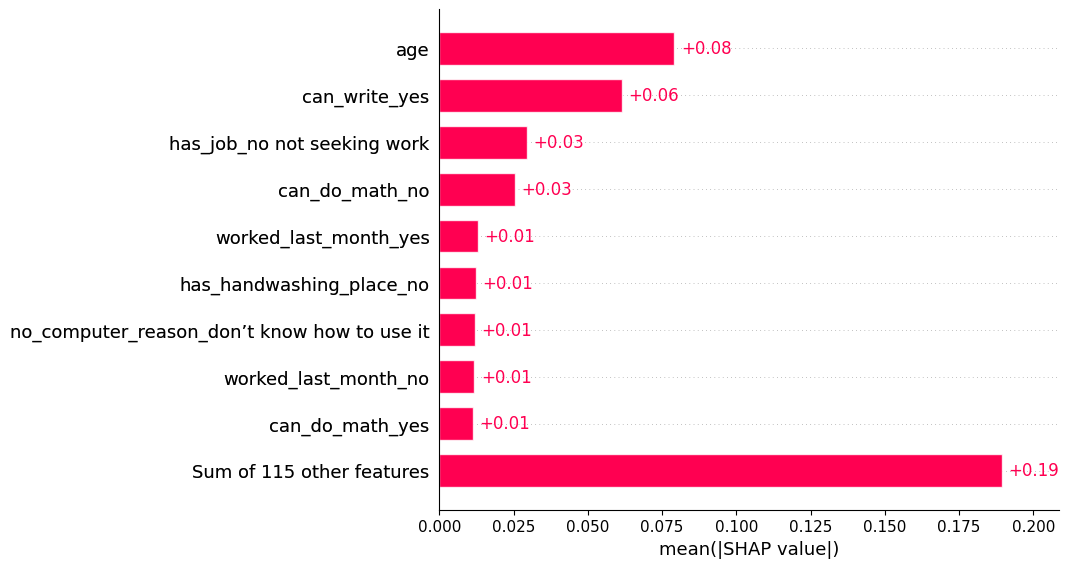

<Figure size 640x480 with 0 Axes>

In [73]:
shap_values_exp = shap.Explanation(
    values=shap_values_subset, 
    base_values=explainer.expected_value[1], 
    data=X_test_subset, 
    feature_names=X_train.columns.to_list()
)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
shap.plots.bar(shap_values_exp)

plt.savefig('shap_bar_plot.png', dpi=150, bbox_inches='tight')  # Save the plot
plt.show()


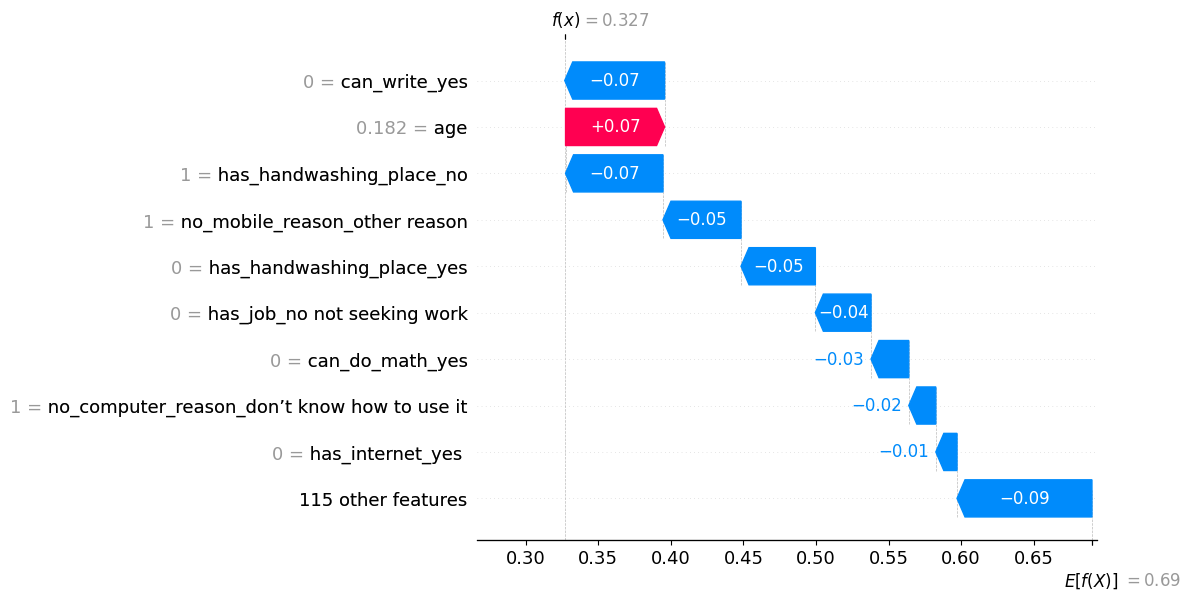

<Figure size 640x480 with 0 Axes>

In [74]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_subset[0],  # SHAP values for the first instance
        base_values=explainer.expected_value[1],  # Expected model output for class 1
        data=X_test_subset.iloc[0],  # Feature values for the first instance
        feature_names=X_train.columns.to_list()
    )
)
plt.savefig('shap_waterfall_plot.png', dpi=150)
plt.show()


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


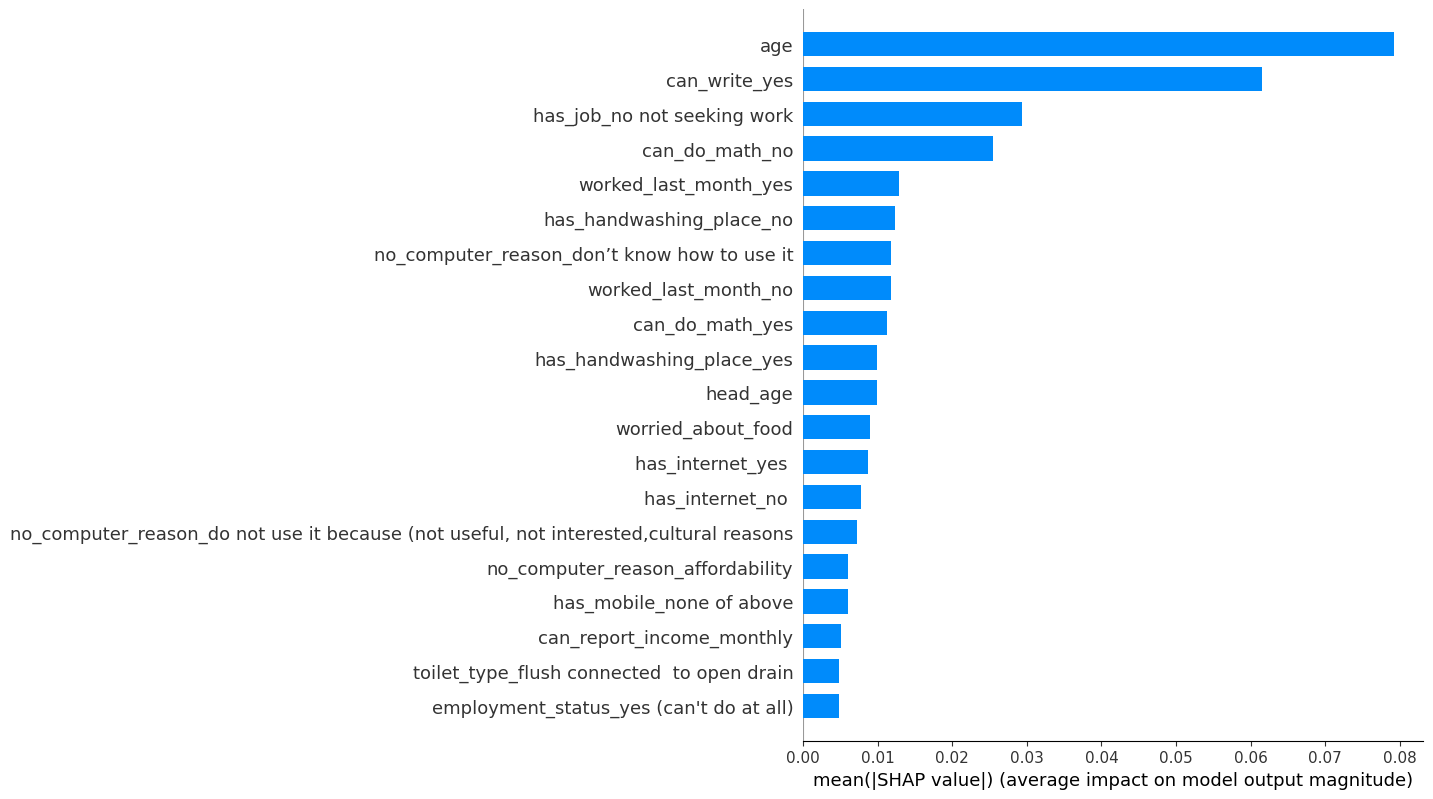

<Figure size 640x480 with 0 Axes>

In [75]:
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values_subset, 
    X_test_subset, 
    feature_names=X_train.columns, 
    plot_type="bar"
)
plt.tight_layout()
plt.savefig('shap_feature_importance_bar.png', dpi=150)
plt.show()


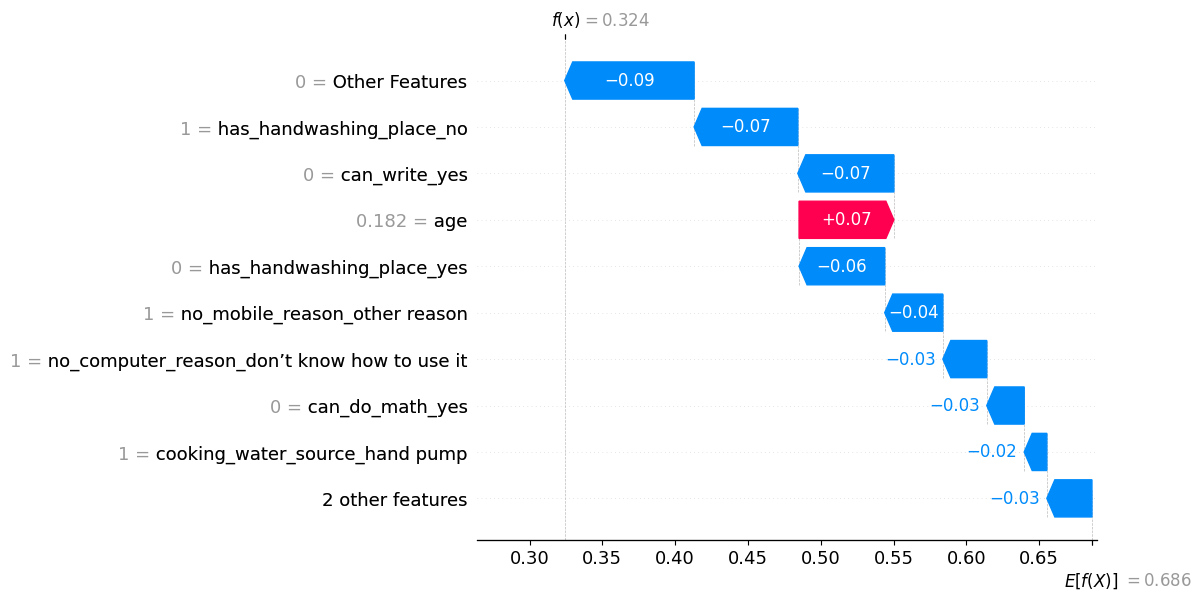

<Figure size 640x480 with 0 Axes>

In [37]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Number of top features to show in the waterfall plot
top_n = 10  

# Extract SHAP values for the first sample
shap_vals = shap_values_subset[0]
feature_names = X_train.columns.to_list()
base_value = explainer.expected_value[1]

# Sort SHAP values by absolute importance
sorted_indices = np.argsort(np.abs(shap_vals))[::-1]  # Descending order
shap_vals_sorted = shap_vals[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]
feature_values_sorted = X_test_subset.iloc[0, sorted_indices]

# Keep only top N features, sum the rest into "Other Features"
if len(shap_vals_sorted) > top_n:
    other_features_sum = np.sum(shap_vals_sorted[top_n:])
    shap_vals_trimmed = np.append(shap_vals_sorted[:top_n], other_features_sum)
    feature_names_trimmed = feature_names_sorted[:top_n] + ["Other Features"]
    feature_values_trimmed = np.append(feature_values_sorted[:top_n], 0)  # No specific value for "Other Features"
else:
    shap_vals_trimmed = shap_vals_sorted
    feature_names_trimmed = feature_names_sorted
    feature_values_trimmed = feature_values_sorted

# Create the SHAP Waterfall Plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_vals_trimmed,
        base_values=base_value,
        data=feature_values_trimmed,
        feature_names=feature_names_trimmed
    )
)

# Save the figure
plt.savefig('shap_waterfall_plot_modified.png', dpi=150)
plt.show()


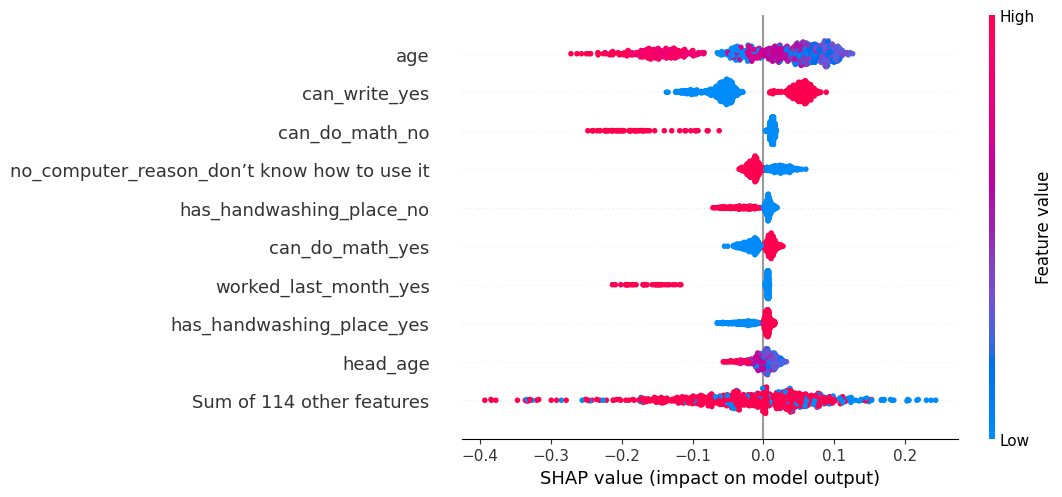

In [38]:
shap.plots.beeswarm(shap_values_exp)

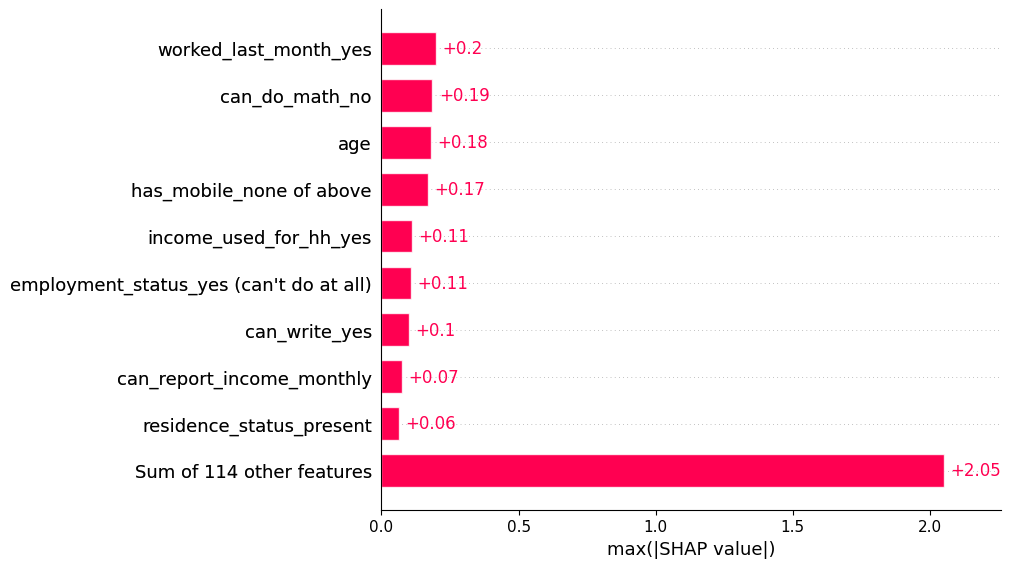

In [39]:
shap.plots.bar(shap_values_exp.abs.max(0))

In [31]:
# Create a DataFrame of SHAP values for class 1
shap_df = pd.DataFrame(shap_values_class1, columns=X_test.columns)

# Compute mean absolute SHAP value for each feature
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Get top 30 features
top_30_features = mean_abs_shap.head(30)

# Display the top 30
print("Top 30 Features by SHAP Importance (Mean Absolute Value):")
print(top_30_features)

# Optionally export to CSV
top_30_features.to_csv("top_30_shap_features.csv")


Top 30 Features by SHAP Importance (Mean Absolute Value):
age                                                                                      0.077608
can_write_yes                                                                            0.058144
can_do_math_no                                                                           0.027089
no_computer_reason_don’t know how to use it                                              0.017327
has_handwashing_place_no                                                                 0.015000
can_do_math_yes                                                                          0.014226
worked_last_month_yes                                                                    0.013703
has_handwashing_place_yes                                                                0.012893
head_age                                                                                 0.011158
has_internet_no                                             